# LGD & EAD Model

This model is based on the PD models that were used. 
The pre processed Data from the PD model will be our input

# Import Libraries

In [2]:
import numpy as np
import pandas as pd

# Import Data

In [4]:
# Import data pre processed data from the PD Mode;
loan_data_preprocessed_backup = pd.read_csv('df_inputs_prepr.csv')

# Explore Data

In [5]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [6]:
loan_data_preprocessed.columns.values
# Displays all column names.

array(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_join

In [7]:
loan_data_preprocessed.head()

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
0      362514        362514  19677589   21900299      32500        32500   
1      288564        288564  29755527   32278795      11000        11000   
2      213591        213591   1343334    1588314      30000        30000   
3      263083        263083  33131681   35775007      14400        14400   
4      165001        165001   3293168    4066358      15000        15000   

   funded_amnt_inv        term  int_rate  installment  ... dti:21.7-22.4  \
0          32500.0   60 months     14.99       773.01  ...             0   
1          11000.0   60 months     20.99       297.53  ...             0   
2          30000.0   36 months     14.65      1034.83  ...             0   
3          14400.0   60 months     14.49       338.74  ...             0   
4          14900.0   36 months      8.90       476.30  ...             0   

  dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
0           0       0                              1   
1           1       0                              1   
2           0       0                              1   
3           0       0                              1   
4           0       0                              1   

  mths_since_last_record:0-2  mths_since_last_record:3-20  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

  mths_since_last_record:21-31 mths_since_last_record:32-80  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:81-86 mths_since_last_record:>=86  
0                            0                           0  
1                            0                           0  
2                            0                           0  
3                            0                           0  
4                            0                           0  

[5 rows x 325 columns]

In [8]:
loan_data_preprocessed.tail()

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
93252         115           115   1055725    1287293       8000         8000   
93253      296284        296284  29023401   31546575      24000        24000   
93254       61777         61777   8995299   10787405      35000        35000   
93255       91763         91763   7062952    8724517      18000        18000   
93256      167512        167512   3286511    4058975      16000        16000   

       funded_amnt_inv        term  int_rate  installment  ... dti:21.7-22.4  \
93252           8000.0   36 months     11.71       264.61  ...             0   
93253          24000.0   60 months     10.15       511.71  ...             0   
93254          34900.0   36 months      8.90      1111.37  ...             0   
93255          17950.0   36 months      8.90       571.56  ...             0   
93256          16000.0   36 months      7.62       498.59  ...             0   

      dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
93252           0       0                              1   
93253           0       0                              1   
93254           0       0                              1   
93255           0       0                              1   
93256           0       0                              1   

      mths_since_last_record:0-2  mths_since_last_record:3-20  \
93252                          0                            0   
93253                          0                            0   
93254                          0                            0   
93255                          0                            0   
93256                          0                            0   

      mths_since_last_record:21-31 mths_since_last_record:32-80  \
93252                            0                            0   
93253                            0                            0   
93254                            0                            0   
93255                            0                            0   
93256                            0                            0   

      mths_since_last_record:81-86 mths_since_last_record:>=86  
93252                            0                           0  
93253                            0                           0  
93254                            0                           0  
93255                            0                           0  
93256                            0                           0  

[5 rows x 325 columns]

To build LGD: we need to see the percentage of exposure that was lost after default

To build EAD: we need to see the total exposure at the moment of default
( normally these are or can been seen in the account or data that has defaulted).

To model EAD and LGD, you would not need all the data that has defualted since some defaulters will pay back part their loan. Hence we focus on borrowers that have had time to repay part of their debt and these are mostly borrowers that are written off.

it is labeled in our data set as In the Loan Status Colunm: Charge off and Does not meet the credit polic. Status Charged Off

In [11]:

loan_data_preprocessed['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Late (31-120 days)', 'In Grace Period', 'Default',
       'Late (16-30 days)'], dtype=object)

In [14]:
# we look for loans that are charged off only and call the Loan Default
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]
# Here we take only the accounts that were charged-off (written-off).


In [16]:
loan_data_defaults.head() # contains rows with only the defined defaults

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
9       351326        351326  20710577   22983151       6000         6000   
20       42139         42139    207697     206931      10000        10000   
21      196634        196634   1549002    1814860       7950         7950   
31      115179        115179   6167965    7650103      35000        35000   
37      106698        106698   6541727    8093780      14400        14400   

    funded_amnt_inv        term  int_rate  installment  ... dti:21.7-22.4  \
9        6000.00000   36 months     10.99       196.41  ...             0   
20        399.98838   36 months     10.78       326.35  ...             0   
21       7950.00000   36 months     18.49       289.37  ...             0   
31      35000.00000   36 months     20.31      1306.27  ...             0   
37      14400.00000   60 months     21.15       390.79  ...             0   

   dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
9            0       0                              1   
20           0       0                              0   
21           0       0                              1   
31           0       0                              1   
37           0       0                              1   

   mths_since_last_record:0-2  mths_since_last_record:3-20  \
9                           0                            0   
20                          1                            0   
21                          0                            0   
31                          0                            0   
37                          0                            0   

   mths_since_last_record:21-31 mths_since_last_record:32-80  \
9                             0                            0   
20                            0                            0   
21                            0                            0   
31                            0                            0   
37                            0                            0   

   mths_since_last_record:81-86 mths_since_last_record:>=86  
9                             0                           0  
20                            0                           0  
21                            0                           0  
31                            0                           0  
37                            0                           0  

[5 rows x 325 columns]

In [17]:
loan_data_defaults.shape

(8617, 325)

# Creating Independent Variables

the independent variables that we are going to use for LGD and EAD are
the same as we used for PD model

### Checking Missing Values

In [18]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [19]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                            0
Unnamed: 0.1                                                          0
id                                                                    0
member_id                                                             0
loan_amnt                                                             0
funded_amnt                                                           0
funded_amnt_inv                                                       0
term                                                                  0
int_rate                                                              0
installment                                                           0
grade                                                                 0
sub_grade                                                             0
emp_title                                                           653
emp_length                                                      

mths_since_last_delinq                                             4733

mths_since_last_record                                             7572

these are continous so we need input them to zero.... the

most conservative approach to risk

In [21]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace= True)

C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace= True)

C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
loan_data_defaults['mths_since_last_record'].isnull().sum()

0

In [24]:
loan_data_defaults['mths_since_last_delinq'].isnull().sum()

0

# Creating Dependent Variables

###### LGD

In practice we work on these two, LGD and EAD one at a time

LGD: is the share of a loan asset or principal that is lost if a borrower defaults. 

This is the proportion of the loan that cannot be recovered after default.

Conventionally, we model the recovery rate first (i.e. the portion that can be recovered first). 

Then the portion that canot be recovered (LGD)  can be modeled (i.e LGD = 1 - recovery rate)

recoveries colum is amount after default

we assume that for defaukted borrowers "funded amount"

column is  the total amount that was lost the moement of default

Recovery Rate = (recoveries)/ (funded amount)


In [26]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    8617.000000
mean        0.060326
std         0.088232
min         0.000000
25%         0.000000
50%         0.029355
75%         0.113201
max         1.220774
Name: recovery_rate, dtype: float64

since recovery rate is rate that is btn 0 and 1, then we shd truncate the values outside this range to either 0 or 1

In [28]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.
# it shd be btn o and 1

count    8617.000000
mean        0.060248
std         0.087315
min         0.000000
25%         0.000000
50%         0.029355
75%         0.113201
max         1.000000
Name: recovery_rate, dtype: float64

######  EAD

Is the total value that lenders are exposed to when theres default

hence it is the max that a lender is exposed to.

Note:on many occassions a bank will grant a loan but might not have disbursed or or the borrower might have paid significant amount of the loan at the time of default. 

But for revolving loans and credit cards, the borrwer can repay and still spend what he/she repaid up to a certain limit. 

So the default is mostly on a proportion of the original funded amount. So that proportion will be our dependent variable for LGD.

This proportion is called Credit Conversion Factor.

Hence EAD = total funded amount * credit conversion factor

In our data the total recovered principal reflect the total payments made on the principal of the loan

In [33]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


If CCF = 0 , there fore all is paid

   CCF = 1, nothing was paid

In [34]:
loan_data_defaults['CCF'].describe()
# Shows some descriptive statisics for the values of a column.

count    8617.000000
mean        0.736350
std         0.201814
min         0.003048
25%         0.634485
50%         0.791082
75%         0.889403
max         1.000000
Name: CCF, dtype: float64

In [35]:
### Save Data into CSV file

loan_data_defaults.to_csv('loan_data_defaults.csv')
# We save the data to a CSV file.

# Visually Explore Dependent Variables

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### LGD: RECOVERY RATE

(array([4.096e+03, 8.000e+01, 1.420e+02, 2.220e+02, 3.600e+02, 4.280e+02,
        1.270e+02, 1.570e+02, 1.800e+02, 2.370e+02, 3.430e+02, 3.890e+02,
        4.590e+02, 4.750e+02, 2.000e+02, 1.200e+02, 1.290e+02, 8.000e+01,
        4.100e+01, 3.800e+01, 3.800e+01, 3.000e+01, 4.000e+01, 2.600e+01,
        1.400e+01, 7.000e+00, 4.000e+00, 1.300e+01, 1.200e+01, 4.000e+00,
        5.000e+00, 6.000e+00, 4.000e+00, 7.000e+00, 7.000e+00, 7.000e+00,
        6.000e+00, 9.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

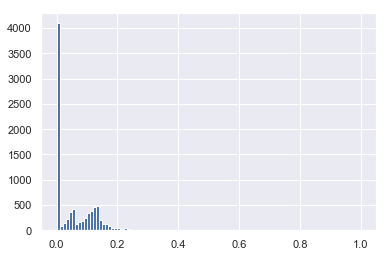

In [37]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 100)
# We plot a histogram of a variable with 100 bins.

(array([4.176e+03, 3.640e+02, 7.880e+02, 2.840e+02, 4.170e+02, 7.320e+02,
        9.340e+02, 3.200e+02, 2.090e+02, 7.900e+01, 6.800e+01, 6.600e+01,
        2.100e+01, 1.700e+01, 1.600e+01, 1.100e+01, 1.100e+01, 1.400e+01,
        1.500e+01, 6.000e+00, 1.000e+01, 3.000e+00, 3.000e+00, 0.000e+00,
        4.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 5.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

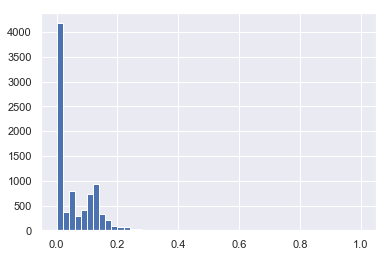

In [38]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)
# We plot a histogram of a variable with 50 bins.

##### Notes on Modeling LGD

we can see that half of the recovery rate is than 0, and the rest is greater 
than zero based on the graph distribution. So for estimating LGD, it is plausible to have a 2 staged approach:

1. to model whether the recovery rate is = 0 or greater than 1 (this is a binary question, hence we can use logistic regression)

2. if recovery rate is greater than o, how much exactly is it? ( cost if it is 0, there is no further modeling) here we use linear regression to solvie it



In [47]:
#using a binary logistic approahch to know where recovery rate is 0 or not

loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# we find out how much exactly is greater than 0.
#Since it is how, we use linear regression
loan_data_defaults['recovery_rate_0_1']

9        0
20       1
21       1
31       1
37       0
48       1
49       1
53       0
60       1
61       1
62       1
82       1
92       0
127      0
128      1
133      1
149      1
201      1
210      0
221      1
226      1
229      0
255      1
265      1
272      0
282      1
291      0
292      0
316      0
321      0
332      1
336      0
375      1
377      0
384      0
387      1
390      0
406      0
408      1
421      0
442      0
443      1
456      0
477      1
478      0
479      0
481      0
482      0
514      0
523      1
531      0
537      1
555      0
556      1
558      0
560      1
562      0
572      1
589      0
592      0
626      1
636      1
637      0
650      1
661      0
669      0
703      0
709      1
713      0
719      0
742      0
754      1
757      1
773      0
786      0
791      0
800      1
812      0
853      1
856      0
859      1
873      1
901      1
908      1
918      0
924      0
926      0
934      0
953      1
957      1
961      0

#### EAD : CCF

(array([  2.,   1.,   5.,   5.,   3.,   6.,  11.,   6.,   4.,  19.,  12.,
          6.,  26.,  14.,   5.,  18.,  18.,   8.,   9.,  14.,  13.,  20.,
         24.,  24.,  14.,  23.,  15.,  31.,  27.,  24.,  24.,  25.,  26.,
         29.,  31.,  39.,  30.,  39.,  39.,  42.,  37.,  42.,  39.,  37.,
         43.,  57.,  45.,  53.,  58.,  47.,  55.,  58.,  67.,  62.,  68.,
         82.,  74.,  64.,  79.,  65.,  80.,  90.,  97.,  92.,  87., 108.,
         86., 107., 135., 108., 163., 123., 115., 172., 159., 171., 171.,
        180., 193., 193., 175., 210., 192., 260., 196., 216., 272., 211.,
        265., 232., 301., 245., 215., 264., 147., 243., 125., 178.,  73.,
        104.]),
 array([0.003048  , 0.01301752, 0.02298704, 0.03295656, 0.04292608,
        0.0528956 , 0.06286512, 0.07283464, 0.08280416, 0.09277368,
        0.1027432 , 0.11271272, 0.12268224, 0.13265176, 0.14262128,
        0.1525908 , 0.16256032, 0.17252984, 0.18249936, 0.19246888,
        0.2024384 , 0.21240792, 0.22237744, 0.

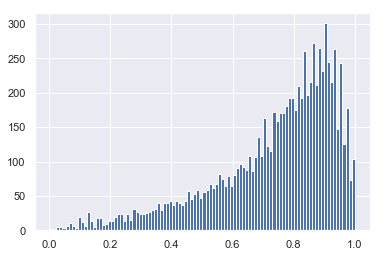

In [44]:
plt.hist(loan_data_defaults['CCF'], bins = 100)
# We plot a histogram of a variable with 100 bins.

In [40]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
loan_data_defaults['recovery_rate_0_1']

9        0
20       1
21       1
31       1
37       0
48       1
49       1
53       0
60       1
61       1
62       1
82       1
92       0
127      0
128      1
133      1
149      1
201      1
210      0
221      1
226      1
229      0
255      1
265      1
272      0
282      1
291      0
292      0
316      0
321      0
332      1
336      0
375      1
377      0
384      0
387      1
390      0
406      0
408      1
421      0
442      0
443      1
456      0
477      1
478      0
479      0
481      0
482      0
514      0
523      1
531      0
537      1
555      0
556      1
558      0
560      1
562      0
572      1
589      0
592      0
626      1
636      1
637      0
650      1
661      0
669      0
703      0
709      1
713      0
719      0
742      0
754      1
757      1
773      0
786      0
791      0
800      1
812      0
853      1
856      0
859      1
873      1
901      1
908      1
918      0
924      0
926      0
934      0
953      1
957      1
961      0

#### Notes on EAD

In [ ]:
The two variables in Recoveries are proportions. that are contraints between 0 and 1

the density of proportions is best described as a specific distribution called; Beta Distribution.

The regression model used called Beta Regressions. Normally, Beta Regression
is used to model outcomes that is greater than 0 and strictly lower than 1, however,
some modifications are allowed to model numbers bigger than 0 and 1 in beta regression
hence it is useful for Credit Conversion  Factor and Recovery Rate Model

Mostl Beta Regressions are in R. Hence we use othre models, linear. 


CCF are more homogenously disributed, so directly applying a linear model
to CCF  will produce satisfactory results.

So in CCF a linear multiple regression model is used.



# BUILDING THE LGD MODEL

First we create a logistic model to know if the Recovery Rate is 0 or 1(or greater than 0).

If it is greater than 0, we will use Linear Regression to estimate how much greater? i.e. the exact value. 

To test how the model performs, we will need a test data set so we have to split data into train and test just as we did for PD




## Spliting the Data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
loan_data_defaults.head(2)

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
9       351326        351326  20710577   22983151       6000         6000   
20       42139         42139    207697     206931      10000        10000   

    funded_amnt_inv        term  int_rate  installment  ...  \
9        6000.00000   36 months     10.99       196.41  ...   
20        399.98838   36 months     10.78       326.35  ...   

   mths_since_last_record:Missing mths_since_last_record:0-2  \
9                               1                          0   
20                              0                          1   

   mths_since_last_record:3-20 mths_since_last_record:21-31  \
9                            0                            0   
20                           0                            0   

   mths_since_last_record:32-80  mths_since_last_record:81-86  \
9                             0                             0   
20                            0                             0   

   mths_since_last_record:>=86 recovery_rate       CCF recovery_rate_0_1  
9                            0      0.000000  0.879938                 0  
20                           0      0.013958  0.310566                 1  

[2 rows x 328 columns]

In [56]:
# We name our model based on stages as described above so we can 
# store the train and test data split
# we are going to drop colums that we know are dependent variables ('recovery_rate','recovery_rate_0_1', 'CCF')
# our indenpendent or target variable for LGS is (recovery_rate_0_1)
#LGD model stage 1 datasets: recovery rate 0 or greater than 0.

lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)


# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

## Preparation of Inputs : Train Data Set

In [57]:
# since we will not be needing all the variables in the split
# lest arganise the data to inlued all the dummies and predictors needed
# we can use the old dummies we created
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [58]:
# we bring in our reference categorieis

features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']
# List of the dummy variable reference categories. 

In [60]:
# view the train input var and update it
lgd_inputs_stage_1_train.head(5)

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
57334      334775        334775  22642607   24985548      27200        27200   
38729      243917        243917  35673783   38369252      10450        10450   
38886      437852        437852  12267303   14259446      24000        24000   
2720       450044        450044  11355488   13287651       6400         6400   
54602      152541        152541   3921496    5015400      16950        16950   

       funded_amnt_inv        term  int_rate  installment  ... dti:21.7-22.4  \
57334          27200.0   60 months     25.83       811.65  ...             0   
38729          10450.0   60 months     26.06       313.25  ...             0   
38886          23875.0   36 months     12.99       808.54  ...             0   
2720            6400.0   36 months     11.99       212.55  ...             0   
54602          16950.0   36 months     18.49       616.96  ...             0   

      dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
57334           1       0                              1   
38729           1       0                              1   
38886           1       0                              1   
2720            0       0                              1   
54602           0       0                              1   

      mths_since_last_record:0-2  mths_since_last_record:3-20  \
57334                          0                            0   
38729                          0                            0   
38886                          0                            0   
2720                           0                            0   
54602                          0                            0   

      mths_since_last_record:21-31 mths_since_last_record:32-80  \
57334                            0                            0   
38729                            0                            0   
38886                            0                            0   
2720                             0                            0   
54602                            0                            0   

      mths_since_last_record:81-86 mths_since_last_record:>=86  
57334                            0                           0  
38729                            0                           0  
38886                            0                           0  
2720                             0                           0  
54602                            0                           0  

[5 rows x 325 columns]

In [61]:
# updating the exiting train data to select only the 
# important variables we needed as listed in the feature all
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]
# Here we keep only the variables we need for the model.

In [62]:
lgd_inputs_stage_1_train.head(5)

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
57334        0        0        0        0        0        0        1   
38729        0        0        0        0        0        0        1   
38886        0        1        0        0        0        0        0   
2720         0        1        0        0        0        0        0   
54602        0        0        0        1        0        0        0   

       home_ownership:MORTGAGE  home_ownership:NONE  home_ownership:OTHER  \
57334                        0                    0                     0   
38729                        0                    0                     0   
38886                        0                    0                     0   
2720                         0                    0                     0   
54602                        0                    0                     0   

       ...    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
57334  ...  33.01          0.0             0.0                     0.0   
38729  ...  24.76          0.0             2.0                     0.0   
38886  ...  30.22          2.0             1.0                    17.0   
2720   ...  15.91          0.0             0.0                    35.0   
54602  ...  18.15          0.0             0.0                     0.0   

       mths_since_last_record  open_acc  pub_rec  total_acc  acc_now_delinq  \
57334                     0.0      17.0      0.0       33.0             0.0   
38729                     0.0       8.0      0.0       14.0             0.0   
38886                     0.0      24.0      0.0       63.0             0.0   
2720                      0.0       7.0      0.0       21.0             0.0   
54602                     0.0       8.0      0.0       17.0             0.0   

       total_rev_hi_lim  
57334           59000.0  
38729           10700.0  
38886           61700.0  
2720            14100.0  
54602           10100.0  

[5 rows x 49 columns]

In [63]:
## we then update again and drop the reference category

lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [64]:
lgd_inputs_stage_1_train.head(5)

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
57334        0        0        0        0        0        0   
38729        0        0        0        0        0        0   
38886        0        1        0        0        0        0   
2720         0        1        0        0        0        0   
54602        0        0        0        1        0        0   

       home_ownership:MORTGAGE  home_ownership:NONE  home_ownership:OTHER  \
57334                        0                    0                     0   
38729                        0                    0                     0   
38886                        0                    0                     0   
2720                         0                    0                     0   
54602                        0                    0                     0   

       home_ownership:OWN  ...    dti  delinq_2yrs  inq_last_6mths  \
57334                   0  ...  33.01          0.0             0.0   
38729                   1  ...  24.76          0.0             2.0   
38886                   0  ...  30.22          2.0             1.0   
2720                    0  ...  15.91          0.0             0.0   
54602                   0  ...  18.15          0.0             0.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
57334                     0.0                     0.0      17.0      0.0   
38729                     0.0                     0.0       8.0      0.0   
38886                    17.0                     0.0      24.0      0.0   
2720                     35.0                     0.0       7.0      0.0   
54602                     0.0                     0.0       8.0      0.0   

       total_acc  acc_now_delinq  total_rev_hi_lim  
57334       33.0             0.0           59000.0  
38729       14.0             0.0           10700.0  
38886       63.0             0.0           61700.0  
2720        21.0             0.0           14100.0  
54602       17.0             0.0           10100.0  

[5 rows x 44 columns]

In [65]:
lgd_inputs_stage_1_train.isnull().sum()
# Check for missing values. We check whether the value of each row for each column is missing or not,
# then sum accross columns.

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

### Estimating the Model

In [68]:
lgd_inputs_stage_1_train.shape

(6893, 44)

In [69]:
lgd_targets_stage_1_train.shape

(6893,)

In [66]:
# Since we need to Estimate the Model to Include P Values We use codes below
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [67]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
# We create an instance of an object from the 'LogisticRegression' class.


In [70]:
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\kwaku\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
# to display summary table for the model results we will use same 
# structure as the PD model
# we store the names of the independent var in the feature name list
feature_name = lgd_inputs_stage_1_train.columns.values
# Stores the names of the columns of a dataframe in a variable.
feature_name

In [72]:
feature_name

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [73]:
## RECALL FROM PD model with some changes
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_1.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

Feature name  Coefficients      p_values
0                             Intercept -7.348821e-03           NaN
1                               grade:A -3.326347e-03  9.863980e-01
2                               grade:B -5.827351e-03  9.700179e-01
3                               grade:C -8.086620e-03  9.565000e-01
4                               grade:D  1.735722e-03  9.909683e-01
5                               grade:E  2.198203e-03  9.896567e-01
6                               grade:F  4.962544e-03  9.800282e-01
7               home_ownership:MORTGAGE  1.177149e-03  9.837902e-01
8                   home_ownership:NONE  7.604252e-05  9.999659e-01
9                  home_ownership:OTHER -1.017894e-04  9.998966e-01
10                   home_ownership:OWN -1.751141e-04  9.984733e-01
11     verification_status:Not Verified -6.134179e-03  9.284854e-01
12  verification_status:Source Verified -9.374728e-03  8.789334e-01
13                          purpose:car -6.919802e-05  9.998022e-01
14           purpose:debt_consolidation -6.244480e-03  9.291247e-01
15                  purpose:educational -4.569924e-04  9.994359e-01
16             purpose:home_improvement  1.336259e-03  9.920377e-01
17                        purpose:house  1.101807e-03  9.973474e-01
18               purpose:major_purchase  1.993167e-03  9.917106e-01
19                      purpose:medical -3.764849e-04  9.986866e-01
20                       purpose:moving  3.430198e-04  9.990924e-01
21                        purpose:other -5.680398e-04  9.962618e-01
22             purpose:renewable_energy  2.767998e-04  9.996754e-01
23               purpose:small_business  8.438957e-04  9.958622e-01
24                     purpose:vacation -8.346441e-04  9.980008e-01
25                      purpose:wedding  5.308905e-04  9.986880e-01
26                initial_list_status:w -3.921067e-02  5.168492e-01
27                             term_int -3.605518e-02  1.716259e-10
28                       emp_length_int  1.368339e-03  8.435650e-01
29                   mths_since_issue_d  2.731707e-02  1.530279e-38
30          mths_since_earliest_cr_line -7.663693e-04  2.200698e-02
31                          funded_amnt  1.325559e-04  7.017471e-09
32                             int_rate  6.214775e-02  2.785318e-06
33                          installment -3.812680e-03  8.278233e-08
34                           annual_inc  6.474640e-07  4.589827e-01
35                                  dti -2.154775e-02  4.685831e-09
36                          delinq_2yrs -7.913151e-04  9.823632e-01
37                       inq_last_6mths  1.665261e-03  9.405745e-01
38               mths_since_last_delinq  1.711700e-03  1.420218e-01
39               mths_since_last_record -4.335871e-03  1.294154e-03
40                             open_acc  7.293353e-04  9.224011e-01
41                              pub_rec -1.280495e-03  9.872912e-01
42                            total_acc -1.089957e-02  7.902981e-04
43                       acc_now_delinq -2.743625e-04  9.994058e-01
44                     total_rev_hi_lim -8.444291e-07  5.819182e-01

In [ ]:
# the results shows that most of the variables are not statistically significant
# so it means that we can not use them to predic the Recovery. 
# so to simply the model we wil leave out these variables

##### Explaing the Model Coefficient will be good for us this time

We have continous var and their Coef show or reflec the change in log-odds
that result from a uniti change in the property of the continous var measure

Eg. On funded amount: the log-odd of recovery rate being greater than 0
    will increase by 1.325559e-04 : = 1.325559/10^4 
    
    E - Notation Number format : 
        e-04 means number /10^4
        e+02 means number * 10^2

        Eg 2: pub_rec	-1.280495e-03: 
                means  the log-odd of recovery rate being greater than 0
    will decrease by -1.280495/ 10^3

In [75]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients      p_values
0                             Intercept -7.348821e-03           NaN
1                               grade:A -3.326347e-03  9.863980e-01
2                               grade:B -5.827351e-03  9.700179e-01
3                               grade:C -8.086620e-03  9.565000e-01
4                               grade:D  1.735722e-03  9.909683e-01
5                               grade:E  2.198203e-03  9.896567e-01
6                               grade:F  4.962544e-03  9.800282e-01
7               home_ownership:MORTGAGE  1.177149e-03  9.837902e-01
8                   home_ownership:NONE  7.604252e-05  9.999659e-01
9                  home_ownership:OTHER -1.017894e-04  9.998966e-01
10                   home_ownership:OWN -1.751141e-04  9.984733e-01
11     verification_status:Not Verified -6.134179e-03  9.284854e-01
12  verification_status:Source Verified -9.374728e-03  8.789334e-01
13                          purpose:car -6.919802e-05  9.998022e-01
14           purpose:debt_consolidation -6.244480e-03  9.291247e-01
15                  purpose:educational -4.569924e-04  9.994359e-01
16             purpose:home_improvement  1.336259e-03  9.920377e-01
17                        purpose:house  1.101807e-03  9.973474e-01
18               purpose:major_purchase  1.993167e-03  9.917106e-01
19                      purpose:medical -3.764849e-04  9.986866e-01
20                       purpose:moving  3.430198e-04  9.990924e-01
21                        purpose:other -5.680398e-04  9.962618e-01
22             purpose:renewable_energy  2.767998e-04  9.996754e-01
23               purpose:small_business  8.438957e-04  9.958622e-01
24                     purpose:vacation -8.346441e-04  9.980008e-01
25                      purpose:wedding  5.308905e-04  9.986880e-01
26                initial_list_status:w -3.921067e-02  5.168492e-01
27                             term_int -3.605518e-02  1.716259e-10
28                       emp_length_int  1.368339e-03  8.435650e-01
29                   mths_since_issue_d  2.731707e-02  1.530279e-38
30          mths_since_earliest_cr_line -7.663693e-04  2.200698e-02
31                          funded_amnt  1.325559e-04  7.017471e-09
32                             int_rate  6.214775e-02  2.785318e-06
33                          installment -3.812680e-03  8.278233e-08
34                           annual_inc  6.474640e-07  4.589827e-01
35                                  dti -2.154775e-02  4.685831e-09
36                          delinq_2yrs -7.913151e-04  9.823632e-01
37                       inq_last_6mths  1.665261e-03  9.405745e-01
38               mths_since_last_delinq  1.711700e-03  1.420218e-01
39               mths_since_last_record -4.335871e-03  1.294154e-03
40                             open_acc  7.293353e-04  9.224011e-01
41                              pub_rec -1.280495e-03  9.872912e-01
42                            total_acc -1.089957e-02  7.902981e-04
43                       acc_now_delinq -2.743625e-04  9.994058e-01
44                     total_rev_hi_lim -8.444291e-07  5.819182e-01

#### Testing The Model

In [80]:
lgd_inputs_stage_1_test.shape

(1724, 325)

In [82]:
lgd_targets_stage_1_test.shape

(1724,)

##### Processing Test Data

In [83]:
#just as before we keep only features useful for us
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
# Here we keep only the variables we need for the model.

In [84]:
# here we drop the ref. categories
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [85]:
lgd_inputs_stage_1_test.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
15471        0        0        0        1        0        0   
25030        0        0        0        0        1        0   
74471        1        0        0        0        0        0   
54452        0        0        1        0        0        0   
47826        0        0        1        0        0        0   

       home_ownership:MORTGAGE  home_ownership:NONE  home_ownership:OTHER  \
15471                        0                    0                     0   
25030                        1                    0                     0   
74471                        0                    0                     0   
54452                        1                    0                     0   
47826                        0                    0                     0   

       home_ownership:OWN  ...    dti  delinq_2yrs  inq_last_6mths  \
15471                   1  ...  20.68          1.0             2.0   
25030                   0  ...  28.46          0.0             2.0   
74471                   0  ...  12.70          0.0             0.0   
54452                   0  ...  29.85          0.0             0.0   
47826                   0  ...  25.44          0.0             0.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
15471                    22.0                    37.0      12.0      2.0   
25030                     0.0                     0.0      12.0      0.0   
74471                     0.0                     0.0      10.0      0.0   
54452                    48.0                     0.0       9.0      0.0   
47826                     0.0                     0.0      10.0      0.0   

       total_acc  acc_now_delinq  total_rev_hi_lim  
15471       24.0             0.0           22800.0  
25030       31.0             0.0           13400.0  
74471       18.0             0.0           15600.0  
54452       18.0             0.0            2100.0  
47826       20.0             0.0           43000.0  

[5 rows x 44 columns]

In [86]:
# to obtain predictions for the test data

y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [87]:
# this gives us raw prediction on the revoery rate
y_hat_test_lgd_stage_1

array([0, 1, 1, ..., 0, 1, 1])

In [88]:
#since we are seeking for estimated probabilities of whether recovery is 0 or greater than 0,
# hence we need use predict proba so we can get 0 and 1 predicting class

y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [89]:
y_hat_test_proba_lgd_stage_1
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.
# column 1 is prob for 0 and column 2 is for 1

array([[0.52855418, 0.47144582],
       [0.47254628, 0.52745372],
       [0.43918725, 0.56081275],
       ...,
       [0.54752753, 0.45247247],
       [0.31554449, 0.68445551],
       [0.46991472, 0.53008528]])

In [90]:
# since probs that are greather than 0 is what we need, we have to select that alone

y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

In [91]:
y_hat_test_proba_lgd_stage_1

array([0.47144582, 0.52745372, 0.56081275, ..., 0.45247247, 0.68445551,
       0.53008528])

### To Access the LGD Model Accuracy

We need to compare the results with the actual values or test targets

##### Process Test Data

In [92]:
# we save the results in a temp folder
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [93]:
lgd_targets_stage_1_test_temp

15471    0
25030    1
74471    0
54452    1
47826    0
53829    0
73330    1
62866    1
67085    1
69533    1
33075    0
68298    0
45389    0
31871    1
32488    0
37127    1
33585    0
29018    1
20385    0
4915     0
73387    1
80755    0
2347     0
65122    1
61274    1
64010    1
67807    0
88541    1
38935    1
88613    1
18106    0
22978    0
66775    0
128      1
11199    0
4868     0
74005    0
3740     1
76372    1
12317    0
28019    0
44935    1
72320    0
71857    0
68054    1
17872    0
43152    0
89784    0
84284    0
50880    0
80820    1
3831     1
54096    1
62366    0
62336    1
11306    1
40977    1
38899    1
953      1
57513    1
69944    0
81000    0
15768    1
90478    1
10175    0
14596    1
47238    0
65545    0
75421    1
82943    0
377      0
85606    0
68755    1
72405    1
43244    1
82015    1
7946     1
31337    0
68050    0
24655    1
24118    0
53486    1
35531    0
78738    0
51889    0
69480    1
18079    1
41689    0
58401    0
12378    1
14189    1

In [94]:
# We reset the index of a dataframe.
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)


In [95]:
lgd_targets_stage_1_test_temp

0       0
1       1
2       0
3       1
4       0
5       0
6       1
7       1
8       1
9       1
10      0
11      0
12      0
13      1
14      0
15      1
16      0
17      1
18      0
19      0
20      1
21      0
22      0
23      1
24      1
25      1
26      0
27      1
28      1
29      1
30      0
31      0
32      0
33      1
34      0
35      0
36      0
37      1
38      1
39      0
40      0
41      1
42      0
43      0
44      1
45      0
46      0
47      0
48      0
49      0
50      1
51      1
52      1
53      0
54      1
55      1
56      1
57      1
58      1
59      1
60      0
61      0
62      1
63      1
64      0
65      1
66      0
67      0
68      1
69      0
70      0
71      0
72      1
73      1
74      1
75      1
76      1
77      0
78      0
79      1
80      0
81      1
82      0
83      0
84      0
85      1
86      1
87      0
88      0
89      1
90      1
91      0
92      0
93      1
94      1
95      1
96      1
97      0
98      1
99      0


In [99]:
y_hat_test_proba_lgd_stage_1

array([0.47144582, 0.52745372, 0.56081275, ..., 0.45247247, 0.68445551,
       0.53008528])

In [100]:
## we concat the temp data with the array of the estimated or predicted PDs

df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)
# Concatenates two dataframes.

In [101]:
df_actual_predicted_probs

recovery_rate_0_1         0
0                     0  0.471446
1                     1  0.527454
2                     0  0.560813
3                     1  0.452556
4                     0  0.509639
5                     0  0.593733
6                     1  0.726677
7                     1  0.505103
8                     1  0.491097
9                     1  0.555302
10                    0  0.399303
11                    0  0.573497
12                    0  0.574907
13                    1  0.395333
14                    0  0.666698
15                    1  0.657767
16                    0  0.325838
17                    1  0.417703
18                    0  0.551454
19                    0  0.549675
20                    1  0.532357
21                    0  0.497266
22                    0  0.446198
23                    1  0.504634
24                    1  0.478905
25                    1  0.625782
26                    0  0.487901
27                    1  0.687823
28                    1  0.536937
29                    1  0.684692
30                    0  0.515310
31                    0  0.436645
32                    0  0.476375
33                    1  0.644046
34                    0  0.460352
35                    0  0.551804
36                    0  0.548288
37                    1  0.647388
38                    1  0.586112
39                    0  0.461456
40                    0  0.589831
41                    1  0.510088
42                    0  0.358749
43                    0  0.542664
44                    1  0.620157
45                    0  0.364097
46                    0  0.478334
47                    0  0.623867
48                    0  0.723822
49                    0  0.377955
50                    1  0.882485
51                    1  0.563168
52                    1  0.875212
53                    0  0.563482
54                    1  0.562574
55                    1  0.473240
56                    1  0.645964
57                    1  0.496511
58                    1  0.924719
59                    1  0.489300
60                    0  0.574273
61                    0  0.626800
62                    1  0.579410
63                    1  0.682673
64                    0  0.523760
65                    1  0.859078
66                    0  0.591369
67                    0  0.420411
68                    1  0.768835
69                    0  0.392032
70                    0  0.365689
71                    0  0.742339
72                    1  0.645238
73                    1  0.604797
74                    1  0.838891
75                    1  0.757468
76                    1  0.422627
77                    0  0.669901
78                    0  0.668728
79                    1  0.632944
80                    0  0.499236
81                    1  0.596092
82                    0  0.559903
83                    0  0.600635
84                    0  0.314054
85                    1  0.707568
86                    1  0.442932
87                    0  0.581565
88                    0  0.212062
89                    1  0.528065
90                    1  0.711005
91                    0  0.769528
92                    0  0.586856
93                    1  0.484544
94                    1  0.421633
95                    1  0.413237
96                    1  0.710638
97                    0  0.493125
98                    1  0.618953
99                    0  0.620782
100                   1  0.635183
101                   1  0.576755
102                   1  0.471938
103                   0  0.639165
104                   0  0.474208
105                   1  0.695184
106                   1  0.828906
107                   0  0.465266
108                   0  0.669976
109                   0  0.420896
110                   1  0.618099
111                   0  0.374938
112                   1  0.678264
113                   1  0.645959
114                   1  0.825644
115                   0  0.548989
116                   0  0.6

In [102]:
# we name the two colums of the dataframe as actual and predicted
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [103]:
3wdf_actual_predicted_probs

lgd_targets_stage_1_test  y_hat_test_proba_lgd_stage_1
0                            0                      0.471446
1                            1                      0.527454
2                            0                      0.560813
3                            1                      0.452556
4                            0                      0.509639
5                            0                      0.593733
6                            1                      0.726677
7                            1                      0.505103
8                            1                      0.491097
9                            1                      0.555302
10                           0                      0.399303
11                           0                      0.573497
12                           0                      0.574907
13                           1                      0.395333
14                           0                      0.666698
15                           1                      0.657767
16                           0                      0.325838
17                           1                      0.417703
18                           0                      0.551454
19                           0                      0.549675
20                           1                      0.532357
21                           0                      0.497266
22                           0                      0.446198
23                           1                      0.504634
24                           1                      0.478905
25                           1                      0.625782
26                           0                      0.487901
27                           1                      0.687823
28                           1                      0.536937
29                           1                      0.684692
30                           0                      0.515310
31                           0                      0.436645
32                           0                      0.476375
33                           1                      0.644046
34                           0                      0.460352
35                           0                      0.551804
36                           0                      0.548288
37                           1                      0.647388
38                           1                      0.586112
39                           0                      0.461456
40                           0                      0.589831
41                           1                      0.510088
42                           0                      0.358749
43                           0                      0.542664
44                           1                      0.620157
45                           0                      0.364097
46                           0                      0.478334
47                           0                      0.623867
48                           0                      0.723822
49                           0                      0.377955
50                           1                      0.882485
51                           1                      0.563168
52                           1                      0.875212
53                           0                      0.563482
54                           1                      0.562574
55                           1                      0.473240
56                           1                      0.645964
57                           1                      0.496511
58                           1                      0.924719
59                           1                      0.489300
60                           0                      0.574273
61                           0                      0.626800
62                           1                      0.579410
63                           1                      0.682673
64                           0           

In [104]:
lgd_inputs_stage_1_test

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
15471        0        0        0        1        0        0   
25030        0        0        0        0        1        0   
74471        1        0        0        0        0        0   
54452        0        0        1        0        0        0   
47826        0        0        1        0        0        0   
53829        0        0        0        0        1        0   
73330        0        0        0        1        0        0   
62866        0        0        0        0        0        1   
67085        0        1        0        0        0        0   
69533        0        0        1        0        0        0   
33075        0        0        0        1        0        0   
68298        0        0        0        1        0        0   
45389        0        0        0        1        0        0   
31871        0        0        0        0        1        0   
32488        0        0        0        0        1        0   
37127        1        0        0        0        0        0   
33585        0        1        0        0        0        0   
29018        0        0        0        0        1        0   
20385        0        0        1        0        0        0   
4915         0        0        1        0        0        0   
73387        0        1        0        0        0        0   
80755        0        0        0        0        1        0   
2347         0        0        0        1        0        0   
65122        0        0        0        1        0        0   
61274        1        0        0        0        0        0   
64010        0        0        0        0        0        0   
67807        0        0        0        0        0        1   
88541        0        0        0        1        0        0   
38935        0        0        1        0        0        0   
88613        0        0        1        0        0        0   
18106        0        1        0        0        0        0   
22978        0        0        0        1        0        0   
66775        0        0        0        0        1        0   
128          0        0        1        0        0        0   
11199        0        1        0        0        0        0   
4868         0        0        1        0        0        0   
74005        1        0        0        0        0        0   
3740         1        0        0        0        0        0   
76372        0        1        0        0        0        0   
12317        0        1        0        0        0        0   
28019        0        0        1        0        0        0   
44935        0        0        1        0        0        0   
72320        0        1        0        0        0        0   
71857        0        0        0        0        1        0   
68054        0        0        0        1        0        0   
17872        0        0        1        0        0        0   
43152        0        0        0        0        1        0   
89784        0        1        0        0        0        0   
84284        0        0        0        1        0        0   
50880        0        0        0        0        1        0   
80820        0        0        0        0        1        0   
3831         0        1        0        0        0        0   
54096        0        0        0        0        0        1   
62366        0        0        0        1        0        0   
62336        0        0        0        1        0        0   
11306        0        0        0        0        0        1   
40977        0        0        0        0        0        0   
38899        0        0        1        0        0        0   
953          0        0        0        0        0        1   
57513        0        0        0        1        0        0   
69944        0        1        0        0        0        0   
81000        1        0        0        0        0        0   
15768        1        0        0      

In [105]:
# we set the index to be equal to the index of the input data fram we use
#  to biuld the entire model so we do not lose the index information along the way

df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [107]:
df_actual_predicted_probs

lgd_targets_stage_1_test  y_hat_test_proba_lgd_stage_1
15471                         0                      0.471446
25030                         1                      0.527454
74471                         0                      0.560813
54452                         1                      0.452556
47826                         0                      0.509639
53829                         0                      0.593733
73330                         1                      0.726677
62866                         1                      0.505103
67085                         1                      0.491097
69533                         1                      0.555302
33075                         0                      0.399303
68298                         0                      0.573497
45389                         0                      0.574907
31871                         1                      0.395333
32488                         0                      0.666698
37127                         1                      0.657767
33585                         0                      0.325838
29018                         1                      0.417703
20385                         0                      0.551454
4915                          0                      0.549675
73387                         1                      0.532357
80755                         0                      0.497266
2347                          0                      0.446198
65122                         1                      0.504634
61274                         1                      0.478905
64010                         1                      0.625782
67807                         0                      0.487901
88541                         1                      0.687823
38935                         1                      0.536937
88613                         1                      0.684692
18106                         0                      0.515310
22978                         0                      0.436645
66775                         0                      0.476375
128                           1                      0.644046
11199                         0                      0.460352
4868                          0                      0.551804
74005                         0                      0.548288
3740                          1                      0.647388
76372                         1                      0.586112
12317                         0                      0.461456
28019                         0                      0.589831
44935                         1                      0.510088
72320                         0                      0.358749
71857                         0                      0.542664
68054                         1                      0.620157
17872                         0                      0.364097
43152                         0                      0.478334
89784                         0                      0.623867
84284                         0                      0.723822
50880                         0                      0.377955
80820                         1                      0.882485
3831                          1                      0.563168
54096                         1                      0.875212
62366                         0                      0.563482
62336                         1                      0.562574
11306                         1                      0.473240
40977                         1                      0.645964
38899                         1                      0.496511
953                           1                      0.924719
57513                         1                      0.489300
69944                         0                      0.574273
81000                         0                      0.626800
15768                         1                      0.579410
90478                         1        

### Estimating the Аccuracy of the Мodel

In [121]:
# we set a treshold 
tr = 0.5

#we add one more colunm to the dataframe which will indicate that if the  prediction
# is greater than Tr, its 1, and O otherwise
# 
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)


# we shall compare the abov created colum with the target variable


# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.


In [122]:
df_actual_predicted_probs.head()

lgd_targets_stage_1_test  y_hat_test_proba_lgd_stage_1  \
15471                         0                      0.471446   
25030                         1                      0.527454   
74471                         0                      0.560813   
54452                         1                      0.452556   
47826                         0                      0.509639   

       y_hat_test_lgd_stage_1  
15471                       0  
25030                       1  
74471                       1  
54452                       0  
47826                       1

In [123]:
# from the actual and predicted value above we can construcute a confusion matix
# this matrix will come as a crosstable

pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-taable where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted    0    1
Actual             
0          320  445
1          186  773

In [124]:
## convert confusion matrix into proportions on rates

pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted         0         1
Actual                       
0          0.185615  0.258121
1          0.107889  0.448376

In [125]:
## calc model accuracy
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.6339907192575406

model accuracy of 63 %is not very great. but this accuracy is not as information as ROC, AUC, GINI  and the Kilmogorovs

#### Checking ROC Curve and ROC AUC

In [126]:
from sklearn.metrics import roc_curve, roc_auc_score

In [127]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
# we store each of the three arrays in a separate variable.

In [128]:
## Visualize ROC 

Text(0.5, 1.0, 'ROC curve')

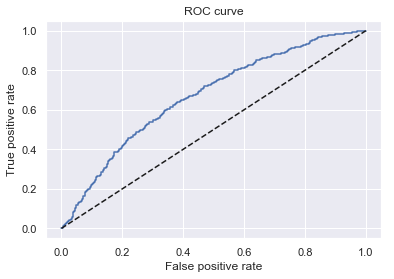

In [129]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [132]:
## CAl Area under the curve

AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6685027295589769

Area Under the curve is 66%, though good, but not great.

Since this model is to be used as the first stage of LGD calcuation, we 
are more concern on a large proportion of correctly classified valued that are greater than 0, than correcly classifevd as 0.

Because at the second stage where we apply the linear model, some of the values classified as greater than 1 maybe estimated to be to equal to 0, thus correcting the current missclassification.
 

## Saving the Model

In [133]:
import pickle # this converspython objects into a character string an vice versa

In [134]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.


#pickle.dump(model, open(filename.sav, 'wb'))
# wb: write bytes
# to unpickle write rb: read byte
## use load instead of dump to read

In [ ]:
#the above save the 'regression_ldg_stage_1 variable into a file' 
# so that it can be loaded into a new notebook to be reused
#pickling it makes it into file smaller than 1-kgb so it can be sent via
# email to someone and incorporate it into their code

### Stage 2 – Linear Regression


We build the linear regression to know the exact amount of recovery rate that are predicted to be above 0.

The model will be a multiple linear regression that will estimate the recovery rate for all borrowers above 0


In [136]:
loan_data_defaults['recovery_rate_0_1'] 
# this col has all the revoceray rate

9        0
20       1
21       1
31       1
37       0
48       1
49       1
53       0
60       1
61       1
62       1
82       1
92       0
127      0
128      1
133      1
149      1
201      1
210      0
221      1
226      1
229      0
255      1
265      1
272      0
282      1
291      0
292      0
316      0
321      0
332      1
336      0
375      1
377      0
384      0
387      1
390      0
406      0
408      1
421      0
442      0
443      1
456      0
477      1
478      0
479      0
481      0
482      0
514      0
523      1
531      0
537      1
555      0
556      1
558      0
560      1
562      0
572      1
589      0
592      0
626      1
636      1
637      0
650      1
661      0
669      0
703      0
709      1
713      0
719      0
742      0
754      1
757      1
773      0
786      0
791      0
800      1
812      0
853      1
856      0
859      1
873      1
901      1
908      1
918      0
924      0
926      0
934      0
953      1
957      1
961      0

In [137]:
# we create a new data frame to fillter only 1

lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]
# Here we takea only rows where the original recovery rate variable is greater than one,
# i.e. where the indicator variable we created is equal to 1.

In [141]:
lgd_stage_2_data['recovery_rate_0_1'].head()

20    1
21    1
31    1
48    1
49    1
Name: recovery_rate_0_1, dtype: int32

In [142]:
## We again split the  lgd_stage_2_data into train and test once more

In [145]:
# LGD model stage 2 datasets: how much more than 0 is the recovery rate
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

##### Running the Linear Regression Model

In [147]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score # to access model performane

In [148]:
# similar to logistic reg, the sk learn do not show p values so wee need to improvise 
#Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [ ]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

### Estimating the Model:

In [150]:
lgd_inputs_stage_2_train.shape

(3895, 325)

In [152]:
lgd_targets_stage_2_train.shape

(3895,)

In [151]:
lgd_inputs_stage_2_test.shape

(974, 325)

In [153]:
lgd_targets_stage_2_test.shape

(974,)

In [154]:
## we pre select the variables we need

lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]
# Here we keep only the variables we need for the model.

In [155]:
lgd_inputs_stage_2_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
42342        0        0        0        0        0        1        0   
60782        0        0        0        0        1        0        0   
22173        0        0        1        0        0        0        0   
43207        0        0        0        0        1        0        0   
81275        0        0        0        1        0        0        0   

       home_ownership:MORTGAGE  home_ownership:NONE  home_ownership:OTHER  \
42342                        0                    0                     0   
60782                        1                    0                     0   
22173                        0                    0                     0   
43207                        1                    0                     0   
81275                        1                    0                     0   

       ...    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
42342  ...  18.40          0.0             2.0                     0.0   
60782  ...  18.36          0.0             1.0                     0.0   
22173  ...  19.15          0.0             0.0                     0.0   
43207  ...  21.39          0.0             0.0                    45.0   
81275  ...  22.46          1.0             2.0                     9.0   

       mths_since_last_record  open_acc  pub_rec  total_acc  acc_now_delinq  \
42342                     0.0       3.0      0.0        5.0             0.0   
60782                     0.0      19.0      0.0       48.0             0.0   
22173                     0.0      10.0      0.0       19.0             0.0   
43207                     0.0       5.0      0.0        8.0             0.0   
81275                     0.0       8.0      0.0       24.0             0.0   

       total_rev_hi_lim  
42342            3200.0  
60782           72100.0  
22173           22100.0  
43207            5900.0  
81275           28000.0  

[5 rows x 49 columns]

In [156]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [157]:
lgd_inputs_stage_2_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
42342        0        0        0        0        0        1   
60782        0        0        0        0        1        0   
22173        0        0        1        0        0        0   
43207        0        0        0        0        1        0   
81275        0        0        0        1        0        0   

       home_ownership:MORTGAGE  home_ownership:NONE  home_ownership:OTHER  \
42342                        0                    0                     0   
60782                        1                    0                     0   
22173                        0                    0                     0   
43207                        1                    0                     0   
81275                        1                    0                     0   

       home_ownership:OWN  ...    dti  delinq_2yrs  inq_last_6mths  \
42342                   0  ...  18.40          0.0             2.0   
60782                   0  ...  18.36          0.0             1.0   
22173                   0  ...  19.15          0.0             0.0   
43207                   0  ...  21.39          0.0             0.0   
81275                   0  ...  22.46          1.0             2.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
42342                     0.0                     0.0       3.0      0.0   
60782                     0.0                     0.0      19.0      0.0   
22173                     0.0                     0.0      10.0      0.0   
43207                    45.0                     0.0       5.0      0.0   
81275                     9.0                     0.0       8.0      0.0   

       total_acc  acc_now_delinq  total_rev_hi_lim  
42342        5.0             0.0            3200.0  
60782       48.0             0.0           72100.0  
22173       19.0             0.0           22100.0  
43207        8.0             0.0            5900.0  
81275       24.0             0.0           28000.0  

[5 rows x 44 columns]

In [158]:
## running the regression

reg_lgd_st_2 = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
## creating summary statisitics

feature_name = lgd_inputs_stage_2_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [160]:
feature_name

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [161]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values.round(3)
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

Feature name  Coefficients  p_values
0                             Intercept  2.999053e-01       NaN
1                               grade:A -1.094539e-01     0.000
2                               grade:B -8.842714e-02     0.000
3                               grade:C -7.123713e-02     0.000
4                               grade:D -4.643908e-02     0.000
5                               grade:E -2.418858e-02     0.004
6                               grade:F -1.617101e-02     0.090
7               home_ownership:MORTGAGE  1.686871e-03     0.583
8                   home_ownership:NONE -2.776713e-02     0.637
9                  home_ownership:OTHER  1.946971e-01     0.000
10                   home_ownership:OWN  1.074750e-02     0.029
11     verification_status:Not Verified  3.999045e-03     0.268
12  verification_status:Source Verified  1.007748e-03     0.762
13                          purpose:car  8.890776e-04     0.947
14           purpose:debt_consolidation  6.250244e-03     0.109
15                  purpose:educational  7.753236e-02     0.001
16             purpose:home_improvement  7.482816e-03     0.271
17                        purpose:house -5.315817e-03     0.719
18               purpose:major_purchase  7.633160e-03     0.412
19                      purpose:medical  5.818992e-03     0.616
20                       purpose:moving  1.175288e-02     0.439
21                        purpose:other  2.663164e-03     0.663
22             purpose:renewable_energy  6.216749e-02     0.014
23               purpose:small_business  1.134799e-02     0.140
24                     purpose:vacation  1.082277e-02     0.550
25                      purpose:wedding  1.142340e-02     0.427
26                initial_list_status:w  1.176251e-02     0.002
27                             term_int  2.442813e-04     0.399
28                       emp_length_int -8.080923e-05     0.830
29                   mths_since_issue_d -1.531756e-03     0.000
30          mths_since_earliest_cr_line  1.562952e-05     0.388
31                          funded_amnt  4.376886e-07     0.702
32                             int_rate -4.568797e-03     0.000
33                          installment -2.650901e-05     0.462
34                           annual_inc  4.863553e-08     0.280
35                                  dti  2.609120e-04     0.186
36                          delinq_2yrs -2.396113e-03     0.199
37                       inq_last_6mths  8.599964e-04     0.433
38               mths_since_last_delinq  7.199343e-06     0.906
39               mths_since_last_record -6.642257e-05     0.438
40                             open_acc -1.366835e-03     0.001
41                              pub_rec  8.458208e-03     0.114
42                            total_acc  6.212586e-04     0.000
43                       acc_now_delinq  1.584335e-02     0.451
44                     total_rev_hi_lim  8.129992e-08     0.333

unlike the first one, a larger number of the variables are significant
the coeff interpretation is much easier:

Since a coeff shows the change in the independent variable that  is going to occurs as a result of a unit change in the respective independent variable.

E.g. Each dollar increase in annual inc is expected to result in a 0.00000486% increase in higher recovery rate.

In [162]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

Feature name  Coefficients  p_values
0                             Intercept  2.999053e-01       NaN
1                               grade:A -1.094539e-01     0.000
2                               grade:B -8.842714e-02     0.000
3                               grade:C -7.123713e-02     0.000
4                               grade:D -4.643908e-02     0.000
5                               grade:E -2.418858e-02     0.004
6                               grade:F -1.617101e-02     0.090
7               home_ownership:MORTGAGE  1.686871e-03     0.583
8                   home_ownership:NONE -2.776713e-02     0.637
9                  home_ownership:OTHER  1.946971e-01     0.000
10                   home_ownership:OWN  1.074750e-02     0.029
11     verification_status:Not Verified  3.999045e-03     0.268
12  verification_status:Source Verified  1.007748e-03     0.762
13                          purpose:car  8.890776e-04     0.947
14           purpose:debt_consolidation  6.250244e-03     0.109
15                  purpose:educational  7.753236e-02     0.001
16             purpose:home_improvement  7.482816e-03     0.271
17                        purpose:house -5.315817e-03     0.719
18               purpose:major_purchase  7.633160e-03     0.412
19                      purpose:medical  5.818992e-03     0.616
20                       purpose:moving  1.175288e-02     0.439
21                        purpose:other  2.663164e-03     0.663
22             purpose:renewable_energy  6.216749e-02     0.014
23               purpose:small_business  1.134799e-02     0.140
24                     purpose:vacation  1.082277e-02     0.550
25                      purpose:wedding  1.142340e-02     0.427
26                initial_list_status:w  1.176251e-02     0.002
27                             term_int  2.442813e-04     0.399
28                       emp_length_int -8.080923e-05     0.830
29                   mths_since_issue_d -1.531756e-03     0.000
30          mths_since_earliest_cr_line  1.562952e-05     0.388
31                          funded_amnt  4.376886e-07     0.702
32                             int_rate -4.568797e-03     0.000
33                          installment -2.650901e-05     0.462
34                           annual_inc  4.863553e-08     0.280
35                                  dti  2.609120e-04     0.186
36                          delinq_2yrs -2.396113e-03     0.199
37                       inq_last_6mths  8.599964e-04     0.433
38               mths_since_last_delinq  7.199343e-06     0.906
39               mths_since_last_record -6.642257e-05     0.438
40                             open_acc -1.366835e-03     0.001
41                              pub_rec  8.458208e-03     0.114
42                            total_acc  6.212586e-04     0.000
43                       acc_now_delinq  1.584335e-02     0.451
44                     total_rev_hi_lim  8.129992e-08     0.333

### Stage 2 Linear Regression Evaluation

In [163]:
#we test the model to see how recovery rate of more than 0 is predicted 

In [165]:
lgd_inputs_stage_2_test.head()

Unnamed: 0  Unnamed: 0.1       id  member_id  loan_amnt  funded_amnt  \
74205      112159        112159  6331234    7862421      10625        10625   
21894        5107          5107   990709    1214704      14000        14000   
22893      176240        176240  2828426    3411071       7200         7200   
79199       66376         66376  8637813   10409708       7200         7200   
33487      159813        159813  3625118    4577308      10000        10000   

       funded_amnt_inv        term  int_rate  installment  ... dti:21.7-22.4  \
74205          10625.0   36 months     18.25       385.46  ...             0   
21894          14000.0   60 months     16.77       346.21  ...             0   
22893           7150.0   36 months     14.09       246.40  ...             1   
79199           7200.0   36 months     11.99       239.11  ...             0   
33487          10000.0   36 months     14.33       343.39  ...             0   

      dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
74205           1       0                              1   
21894           0       0                              1   
22893           0       0                              0   
79199           0       0                              1   
33487           0       0                              1   

      mths_since_last_record:0-2  mths_since_last_record:3-20  \
74205                          0                            0   
21894                          0                            0   
22893                          0                            0   
79199                          0                            0   
33487                          0                            0   

      mths_since_last_record:21-31 mths_since_last_record:32-80  \
74205                            0                            0   
21894                            0                            0   
22893                            0                            0   
79199                            0                            0   
33487                            0                            0   

      mths_since_last_record:81-86 mths_since_last_record:>=86  
74205                            0                           0  
21894                            0                           0  
22893                            0                           1  
79199                            0                           0  
33487                            0                           0  

[5 rows x 325 columns]

In [166]:
# we only keet the relevant variables 
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
# Here we keep only the variables we need for the model.

In [167]:
lgd_inputs_stage_2_test.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
74205        0        0        0        1        0        0        0   
21894        0        0        0        1        0        0        0   
22893        0        1        0        0        0        0        0   
79199        0        1        0        0        0        0        0   
33487        0        0        1        0        0        0        0   

       home_ownership:MORTGAGE  home_ownership:NONE  home_ownership:OTHER  \
74205                        0                    0                     0   
21894                        1                    0                     0   
22893                        0                    0                     0   
79199                        1                    0                     0   
33487                        0                    0                     0   

       ...    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
74205  ...  30.46          0.0             1.0                    67.0   
21894  ...  20.42          0.0             2.0                    36.0   
22893  ...  22.35          0.0             1.0                     0.0   
79199  ...  19.49          0.0             1.0                     0.0   
33487  ...  11.13          0.0             1.0                    62.0   

       mths_since_last_record  open_acc  pub_rec  total_acc  acc_now_delinq  \
74205                     0.0       8.0      0.0       17.0             0.0   
21894                     0.0       8.0      0.0       27.0             0.0   
22893                   115.0      12.0      1.0       25.0             0.0   
79199                     0.0      14.0      0.0       38.0             0.0   
33487                     0.0       7.0      0.0       18.0             0.0   

       total_rev_hi_lim  
74205           22400.0  
21894           14000.0  
22893           17200.0  
79199           15200.0  
33487           12300.0  

[5 rows x 49 columns]

In [168]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [169]:
lgd_inputs_stage_2_test.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
74205        0        0        0        1        0        0   
21894        0        0        0        1        0        0   
22893        0        1        0        0        0        0   
79199        0        1        0        0        0        0   
33487        0        0        1        0        0        0   

       home_ownership:MORTGAGE  home_ownership:NONE  home_ownership:OTHER  \
74205                        0                    0                     0   
21894                        1                    0                     0   
22893                        0                    0                     0   
79199                        1                    0                     0   
33487                        0                    0                     0   

       home_ownership:OWN  ...    dti  delinq_2yrs  inq_last_6mths  \
74205                   0  ...  30.46          0.0             1.0   
21894                   0  ...  20.42          0.0             2.0   
22893                   0  ...  22.35          0.0             1.0   
79199                   0  ...  19.49          0.0             1.0   
33487                   0  ...  11.13          0.0             1.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
74205                    67.0                     0.0       8.0      0.0   
21894                    36.0                     0.0       8.0      0.0   
22893                     0.0                   115.0      12.0      1.0   
79199                     0.0                     0.0      14.0      0.0   
33487                    62.0                     0.0       7.0      0.0   

       total_acc  acc_now_delinq  total_rev_hi_lim  
74205       17.0             0.0           22400.0  
21894       27.0             0.0           14000.0  
22893       25.0             0.0           17200.0  
79199       38.0             0.0           15200.0  
33487       18.0             0.0           12300.0  

[5 rows x 44 columns]

In [170]:
lgd_inputs_stage_2_test.columns.values
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [ ]:
## We store the recovery rate predictionss

In [171]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

Accessing How the Model Predicts Values
we use the correlations betweeen the actual and the predicted
values a a proxy of the model performance

In [173]:
lgd_targets_stage_2_test.head() # actual values

74205    0.123350
21894    0.052437
22893    0.850753
79199    0.116251
33487    0.902692
Name: recovery_rate, dtype: float64

In [175]:
y_hat_test_lgd_stage_2 # predicted values

array([ 0.11471509,  0.10910196,  0.09312531,  0.11648046,  0.11455705,
        0.12768035,  0.12449948,  0.15186621,  0.1732291 ,  0.102813  ,
        0.10501396,  0.07639568,  0.09861916,  0.10890811,  0.12621624,
        0.10417946,  0.10070138,  0.08470206,  0.07665562,  0.10665635,
        0.10613504,  0.06302065,  0.15998574,  0.095465  ,  0.12222512,
        0.15810541,  0.07569208,  0.14395741,  0.09043803,  0.08386185,
        0.10269861,  0.12898786,  0.13557089,  0.06910118,  0.06287628,
        0.1104352 ,  0.10155615,  0.08616765,  0.1003561 ,  0.09457553,
        0.11359941,  0.09064357,  0.12397831,  0.09608969,  0.10798913,
        0.11016689,  0.08116455,  0.13712892,  0.14401831,  0.08413704,
        0.11537873,  0.09047379,  0.09325887,  0.09677972,  0.07750011,
        0.17587101,  0.10945409,  0.10842395,  0.09858074,  0.06710685,
        0.11368218,  0.10716366,  0.09048319,  0.08659909,  0.07336713,
        0.1041053 ,  0.11297675,  0.13910993,  0.14634322,  0.09

In [176]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [177]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)
# We reset the index of a dataframe.

In [179]:
# we concate the predicted and the acctual
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

recovery_rate       0
recovery_rate         1.0000  0.2142
0                     0.2142  1.0000

the correlation btn actual and predicted value is 0.212.This is weak to model correlation in general, but statisfactory for an lgd model. but if corr was too high we could have access






looking at the distribution of the differences btn actual and predicted values called Residuals. 
If it is ok, the distribution will be close to a normal distribution and will hav a mean of 0.




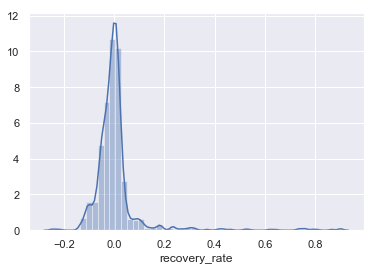

In [180]:
#ploting the distribution to check if it is normal

sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)
# We plot the distribution of the residuals.

the distribution resembles a normal distribution and most of the residuals 
are symetrically distributed around 0.

0 is also the place where most are concentrated. So methodologically it seems to be a good model



TO reach the actual LGD model, we must combine the 2 stages

In [182]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.

### Combining Stage 1 and Stage 2

In [195]:
# Predicting Recovery Rate Based on Stage 1 & 2
# to evaluate the recovery rate we need both test input and target

In [196]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [197]:
y_hat_test_lgd_stage_2_all # this contains the estimated recovey rate

array([0.17095247, 0.14314588, 0.08297277, ..., 0.13869063, 0.10451993,
       0.10122082])

In [198]:
# obtaining the combined or final recovey rate from the stage 1first and then the 
#two stages
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all
# Here we combine the predictions of the models from the two stages.

# wherever there is a 0 from stqage 1, it multpliesby all value in stage 2 so 
# it comes 0. Ans where it is 1, it multplis and still beome 1

In [191]:
y_hat_test_lgd

array([0.        , 0.14314588, 0.08297277, ..., 0.        , 0.10451993,
       0.10122082])

In [192]:
pd.DataFrame(y_hat_test_lgd).describe()
# Shows some descriptive statisics for the values of a column.

0
count  1724.000000
mean      0.072587
std       0.052243
min       0.000000
25%       0.000000
50%       0.087273
75%       0.112904
max       0.225985

NB:there can be some negatives expectially in the min value.
    
It mostly means: the models is not contraint to produce values btn 0 and 1, hence

In [199]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [200]:
pd.DataFrame(y_hat_test_lgd).describe()
# Shows some descriptive statisics for the values of a column.

0
count  1724.000000
mean      0.072587
std       0.052243
min       0.000000
25%       0.000000
50%       0.087273
75%       0.112904
max       0.225985

In [202]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.

# EAD Model

As stated the dependent var for EAD model is the CCF: that is the portion 
    of the or from the original loan amount that is still outstanding at the 
    moment default happens.
    

From the distribution, we got to know that it is better to rely on simple linear regression to model the EAD


Just like PD and LGD we need to get data set and split them into train and test data 

### Estimation and Interpretation

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
loan_data_defaults.head()

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
9       351326        351326  20710577   22983151       6000         6000   
20       42139         42139    207697     206931      10000        10000   
21      196634        196634   1549002    1814860       7950         7950   
31      115179        115179   6167965    7650103      35000        35000   
37      106698        106698   6541727    8093780      14400        14400   

    funded_amnt_inv        term  int_rate  installment  ...  \
9        6000.00000   36 months     10.99       196.41  ...   
20        399.98838   36 months     10.78       326.35  ...   
21       7950.00000   36 months     18.49       289.37  ...   
31      35000.00000   36 months     20.31      1306.27  ...   
37      14400.00000   60 months     21.15       390.79  ...   

   mths_since_last_record:Missing mths_since_last_record:0-2  \
9                               1                          0   
20                              0                          1   
21                              1                          0   
31                              1                          0   
37                              1                          0   

   mths_since_last_record:3-20 mths_since_last_record:21-31  \
9                            0                            0   
20                           0                            0   
21                           0                            0   
31                           0                            0   
37                           0                            0   

   mths_since_last_record:32-80  mths_since_last_record:81-86  \
9                             0                             0   
20                            0                             0   
21                            0                             0   
31                            0                             0   
37                            0                             0   

   mths_since_last_record:>=86 recovery_rate       CCF recovery_rate_0_1  
9                            0      0.000000  0.879938                 0  
20                           0      0.013958  0.310566                 1  
21                           0      0.070797  0.485135                 1  
31                           0      0.114833  0.803497                 1  
37                           0      0.000000  0.929789                 0  

[5 rows x 328 columns]

In [208]:
# EAD model datasets split same as the LGD and take out dependent variable and then start CCF as the independent (target var)

ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [207]:
ead_inputs_train.shape

(6893, 325)

In [209]:
ead_targets_train.shape

(6893,)

In [210]:
ead_inputs_test.shape

(1724, 325)

In [211]:
ead_targets_test.shape

(1724,)

In [212]:
ead_inputs_train.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_join

In [213]:
# we trim down the variable nme to what we placed in the 
# feature all list and then take out ref categorical variables
ead_inputs_train = ead_inputs_train[features_all]
# Here we keep only the variables we need for the model.

In [214]:
ead_inputs_train.shape

(6893, 49)

In [215]:
# we take out ref. cate var
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [216]:
ead_inputs_train.shape

(6893, 44)

In [220]:
# For obtaining P Values:

import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [221]:
### we run the model

reg_ead = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_ead.fit(ead_inputs_train, ead_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [222]:
# we make it a summary table for the result

feature_name = ead_inputs_train.columns.values

In [223]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

Feature name  Coefficients      p_values
0                             Intercept  1.121193e+00           NaN
1                               grade:A -3.363715e-01  0.000000e+00
2                               grade:B -2.502152e-01  0.000000e+00
3                               grade:C -1.838025e-01  0.000000e+00
4                               grade:D -1.292571e-01  9.958676e-10
5                               grade:E -7.701433e-02  3.931212e-03
6                               grade:F -3.024836e-02  9.000171e-02
7               home_ownership:MORTGAGE -3.471312e-03  5.832165e-01
8                   home_ownership:NONE -3.818931e-02  6.373602e-01
9                  home_ownership:OTHER -5.149824e-02  2.924468e-06
10                   home_ownership:OWN  3.177333e-03  2.862933e-02
11     verification_status:Not Verified -6.622920e-03  2.679079e-01
12  verification_status:Source Verified  7.771352e-03  7.618787e-01
13                          purpose:car -2.812096e-02  9.470745e-01
14           purpose:debt_consolidation  1.292375e-02  1.085206e-01
15                  purpose:educational  9.459742e-02  7.331251e-04
16             purpose:home_improvement  1.516310e-02  2.708088e-01
17                        purpose:house -1.423735e-02  7.186539e-01
18               purpose:major_purchase  2.482439e-02  4.118663e-01
19                      purpose:medical  3.886956e-02  6.161743e-01
20                       purpose:moving  9.554966e-02  4.392195e-01
21                        purpose:other  3.425330e-02  6.629304e-01
22             purpose:renewable_energy  6.324579e-02  1.417014e-02
23               purpose:small_business  3.294229e-02  1.404199e-01
24                     purpose:vacation  4.182858e-03  5.503335e-01
25                      purpose:wedding  2.957252e-02  4.272068e-01
26                initial_list_status:w  1.345437e-02  1.905716e-03
27                             term_int  4.524201e-03  3.990818e-01
28                       emp_length_int -1.472399e-03  8.295394e-01
29                   mths_since_issue_d -4.052464e-03  0.000000e+00
30          mths_since_earliest_cr_line -7.061887e-05  3.883659e-01
31                          funded_amnt  2.104559e-06  7.021117e-01
32                             int_rate -1.216787e-02  8.964163e-12
33                          installment -6.034913e-05  4.620090e-01
34                           annual_inc  5.227292e-08  2.796239e-01
35                                  dti  5.372904e-04  1.855326e-01
36                          delinq_2yrs  4.666618e-03  1.985833e-01
37                       inq_last_6mths  9.395890e-03  4.332610e-01
38               mths_since_last_delinq -4.947679e-05  9.060330e-01
39               mths_since_last_record -1.084178e-04  4.383438e-01
40                             open_acc -2.794790e-03  7.748139e-04
41                              pub_rec  4.699803e-03  1.141744e-01
42                            total_acc  5.587394e-04  4.962394e-04
43                       acc_now_delinq -4.054771e-03  4.506468e-01
44                     total_rev_hi_lim  2.544859e-07  3.329532e-01

Interpretation of Coeff:
    
    1. positive Coeff means increase in the CCF ( ie.exposure amount at default will be higher hence higer risk)
    2. Negative means Decrease in CCF  ( ie.exposure amount at default will be lower  hence lower risk)
    
Eg: 
    If Borrower with Grade A: coeff -3.363715e-01 (0.33), means that their 
        CCC is expected to be about 30% lower than CCF of a grade G (i.e. the reference cate).
        
 For continous Variables: Eg Interest Rate: coeff = -1.216787e-02
 
 So with each expected increase in interest rate, the CCF (i.e amount owned at time of detault) will be about 1.21% lower
 
 

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

### Model Validation

Oue focus is on how well the linear model predicts the CCF 

we use the test data

In [224]:
ead_inputs_test = ead_inputs_test[features_all]
# Here we keep only the variables we need for the model.

In [225]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [226]:
ead_inputs_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [227]:
ead_inputs_test.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
15471        0        0        0        1        0        0   
25030        0        0        0        0        1        0   
74471        1        0        0        0        0        0   
54452        0        0        1        0        0        0   
47826        0        0        1        0        0        0   

       home_ownership:MORTGAGE  home_ownership:NONE  home_ownership:OTHER  \
15471                        0                    0                     0   
25030                        1                    0                     0   
74471                        0                    0                     0   
54452                        1                    0                     0   
47826                        0                    0                     0   

       home_ownership:OWN  ...    dti  delinq_2yrs  inq_last_6mths  \
15471                   1  ...  20.68          1.0             2.0   
25030                   0  ...  28.46          0.0             2.0   
74471                   0  ...  12.70          0.0             0.0   
54452                   0  ...  29.85          0.0             0.0   
47826                   0  ...  25.44          0.0             0.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
15471                    22.0                    37.0      12.0      2.0   
25030                     0.0                     0.0      12.0      0.0   
74471                     0.0                     0.0      10.0      0.0   
54452                    48.0                     0.0       9.0      0.0   
47826                     0.0                     0.0      10.0      0.0   

       total_acc  acc_now_delinq  total_rev_hi_lim  
15471       24.0             0.0           22800.0  
25030       31.0             0.0           13400.0  
74471       18.0             0.0           15600.0  
54452       18.0             0.0            2100.0  
47826       20.0             0.0           43000.0  

[5 rows x 44 columns]

In [228]:
## use to predict the model 
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [229]:
y_hat_test_ead # contains the predicted CCF estimate for the model

array([0.81588509, 0.78829185, 0.60511025, ..., 0.77490244, 0.77301447,
       0.65028559])

In [230]:
# to access how well the model predicts the acutal value, we will calculate
# the correlation between the actual and the predicted values
# first we placed the predicted values in a temp folder
ead_targets_test_temp = ead_targets_test

In [233]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)
# We reset the index of a dataframe and drop it

In [234]:
# we concatenat the actual and the predicted values and calculate the correlation between

pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

CCF        0
CCF  1.00000  0.52381
0    0.52381  1.00000

the corr btn actual and predicted value is more than 0.53 which is a moderate
positive corr which is good. 

To make sure of it, we do look at the distribution of the residuals (i.e. the diff btn acutal and predicted vals)

if it is normal distribution with a mean of 0 and then it means the model is ok




In [235]:
## visual for the distribution of residuals

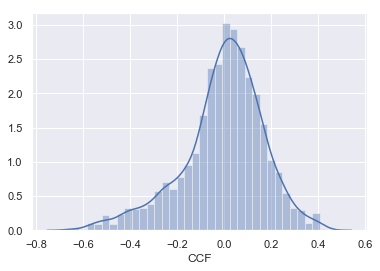

In [236]:
sns.distplot(ead_targets_test - y_hat_test_ead)
# We plot the distribution of the residuals.

the distribution looks like a normal dist and most of the residuals are 
distributed around 0. SO it predictive power is good, methodoligcally

In [238]:
## lets find the decriptive of the predicted values
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

0
count  1724.000000
mean      0.739135
std       0.104097
min       0.357974
25%       0.665005
50%       0.733853
75%       0.813108
max       1.031625

since the max is greater than one, we need to reset them so it cannot be greater than one.

In [239]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [240]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

0
count  1724.000000
mean      0.739116
std       0.104048
min       0.357974
25%       0.665005
50%       0.733853
75%       0.813108
max       1.000000

# Expected Loss

EL = PD * LGD* EAD


Based on the estimation we have done, we can calc the EL of any given borrower. We just need to take their input data and calc, PD, LGD, and EAD. However, banks dont really care about the loss on a single borrower.but on their loan portfolio. 


So they wan to know the EL of all borrowers and this is :
Total Expected Loss = sum of all expected loss on all account or borrowers


In [242]:
# to imploy or use the whole portfolio, we will take the whole data used
# training and testing the model. USe the pre processed version of the data

loan_data_preprocessed.head()

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
0      362514        362514  19677589   21900299      32500        32500   
1      288564        288564  29755527   32278795      11000        11000   
2      213591        213591   1343334    1588314      30000        30000   
3      263083        263083  33131681   35775007      14400        14400   
4      165001        165001   3293168    4066358      15000        15000   

   funded_amnt_inv        term  int_rate  installment  ... dti:21.7-22.4  \
0          32500.0   60 months     14.99       773.01  ...             0   
1          11000.0   60 months     20.99       297.53  ...             0   
2          30000.0   36 months     14.65      1034.83  ...             0   
3          14400.0   60 months     14.49       338.74  ...             0   
4          14900.0   36 months      8.90       476.30  ...             0   

  dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
0           0       0                              1   
1           1       0                              1   
2           0       0                              1   
3           0       0                              1   
4           0       0                              1   

  mths_since_last_record:0-2  mths_since_last_record:3-20  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

  mths_since_last_record:21-31 mths_since_last_record:32-80  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:81-86 mths_since_last_record:>=86  
0                            0                           0  
1                            0                           0  
2                            0                           0  
3                            0                           0  
4                            0                           0  

[5 rows x 325 columns]

In [243]:
## check missing values and fix them 
loan_data_preprocessed.isnull().sum()

Unnamed: 0                                                             0
Unnamed: 0.1                                                           0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           5512
emp_length                                         

these are important to fill with 0

mths_since_last_delinq                                             50166

mths_since_last_record                                             80686

In [244]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

In [245]:
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

This makes the Data same for EAD and LDG, but different from PD Model. hence it is goodto have a separate data 

In [248]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]
# Here we keep only the variables we need for the model.

In [249]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [250]:
loan_data_preprocessed_lgd_ead.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0        0        0        1        0        0        0   
1        0        0        0        0        1        0   
2        0        0        1        0        0        0   
3        0        0        1        0        0        0   
4        1        0        0        0        0        0   

   home_ownership:MORTGAGE  home_ownership:NONE  home_ownership:OTHER  \
0                        1                    0                     0   
1                        1                    0                     0   
2                        1                    0                     0   
3                        1                    0                     0   
4                        1                    0                     0   

   home_ownership:OWN  ...    dti  delinq_2yrs  inq_last_6mths  \
0                   0  ...   9.32          0.0             0.0   
1                   0  ...  24.19          1.0             0.0   
2                   0  ...  13.34          0.0             0.0   
3                   0  ...  17.69          0.0             0.0   
4                   0  ...   8.30          0.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     0.0                     0.0       7.0      0.0   
1                     3.0                     0.0      18.0      0.0   
2                    41.0                     0.0       9.0      0.0   
3                     0.0                     0.0      12.0      0.0   
4                    39.0                     0.0       7.0      0.0   

   total_acc  acc_now_delinq  total_rev_hi_lim  
0       20.0             0.0           25100.0  
1       43.0             0.0           24000.0  
2       38.0             0.0           30000.0  
3       31.0             0.0           17400.0  
4       20.0             0.0            8700.0  

[5 rows x 44 columns]

###### Getting Recovery Rate & LGD 

LGD = 1 - Recovery Rate. Since we have recovery rate estimated let add it to the
loan_data_preprocessed_lgd_ead

In [251]:
# we create a new col in the loan pre pro data
# and make it equal to the predictions from the lgd model stage o1 predictions using the 
# data from the input variable from the loan_data_preprocessed_lgd_ead datafram

loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)
# We apply the stage 1 LGD model and calculate predicted values.

In [252]:
#we do same above for stage 2 lgd

loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)
# We apply the stage 2 LGD model and calculate predicted values.

In [254]:
loan_data_preprocessed.head()

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
0      362514        362514  19677589   21900299      32500        32500   
1      288564        288564  29755527   32278795      11000        11000   
2      213591        213591   1343334    1588314      30000        30000   
3      263083        263083  33131681   35775007      14400        14400   
4      165001        165001   3293168    4066358      15000        15000   

   funded_amnt_inv        term  int_rate  installment  ... dti:>35  \
0          32500.0   60 months     14.99       773.01  ...       0   
1          11000.0   60 months     20.99       297.53  ...       0   
2          30000.0   36 months     14.65      1034.83  ...       0   
3          14400.0   60 months     14.49       338.74  ...       0   
4          14900.0   36 months      8.90       476.30  ...       0   

  mths_since_last_record:Missing mths_since_last_record:0-2  \
0                              1                          0   
1                              1                          0   
2                              1                          0   
3                              1                          0   
4                              1                          0   

  mths_since_last_record:3-20 mths_since_last_record:21-31  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   mths_since_last_record:32-80 mths_since_last_record:81-86  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

  mths_since_last_record:>=86 recovery_rate_st_1 recovery_rate_st_2  
0                           0                  1           0.128681  
1                           0                  0           0.159755  
2                           0                  1           0.092287  
3                           0                  0           0.152477  
4                           0                  1           0.087112  

[5 rows x 327 columns]

In [258]:
# we combinethe outputs of the two mdels in a new colunm called recovery rate
# we multiply the recovery rate output of the two colunms since one is 0 and 1..we get the same

In [259]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']
# We combine the predicted values from the stage 1 predicted model and the stage 2 predicted model
# to calculate the final estimated recovery rate.

In [260]:
loan_data_preprocessed.head()

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
0      362514        362514  19677589   21900299      32500        32500   
1      288564        288564  29755527   32278795      11000        11000   
2      213591        213591   1343334    1588314      30000        30000   
3      263083        263083  33131681   35775007      14400        14400   
4      165001        165001   3293168    4066358      15000        15000   

   funded_amnt_inv        term  int_rate  installment  ...  \
0          32500.0   60 months     14.99       773.01  ...   
1          11000.0   60 months     20.99       297.53  ...   
2          30000.0   36 months     14.65      1034.83  ...   
3          14400.0   60 months     14.49       338.74  ...   
4          14900.0   36 months      8.90       476.30  ...   

  mths_since_last_record:Missing mths_since_last_record:0-2  \
0                              1                          0   
1                              1                          0   
2                              1                          0   
3                              1                          0   
4                              1                          0   

  mths_since_last_record:3-20 mths_since_last_record:21-31  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

  mths_since_last_record:32-80  mths_since_last_record:81-86  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

  mths_since_last_record:>=86 recovery_rate_st_1 recovery_rate_st_2  \
0                           0                  1           0.128681   
1                           0                  0           0.159755   
2                           0                  1           0.092287   
3                           0                  0           0.152477   
4                           0                  1           0.087112   

  recovery_rate  
0      0.128681  
1      0.000000  
2      0.092287  
3      0.000000  
4      0.087112  

[5 rows x 328 columns]

In [261]:
# from the LGD model we saw the prediction could predict values lowe than 0and more than 0, 
# we need to restrict them to 0and 1 range

In [262]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])
# We set estimated recovery rates that are greater than 1 to 1 and  estimated recovery rates that are less than 0 to 0.

In [263]:
# to Get LGD Value = 1 - recovery rate

loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']
# We calculate estimated LGD. Estimated LGD equals 1 - estimated recovery rate.

In [264]:
loan_data_preprocessed.head()

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
0      362514        362514  19677589   21900299      32500        32500   
1      288564        288564  29755527   32278795      11000        11000   
2      213591        213591   1343334    1588314      30000        30000   
3      263083        263083  33131681   35775007      14400        14400   
4      165001        165001   3293168    4066358      15000        15000   

   funded_amnt_inv        term  int_rate  installment  ...  \
0          32500.0   60 months     14.99       773.01  ...   
1          11000.0   60 months     20.99       297.53  ...   
2          30000.0   36 months     14.65      1034.83  ...   
3          14400.0   60 months     14.49       338.74  ...   
4          14900.0   36 months      8.90       476.30  ...   

  mths_since_last_record:0-2 mths_since_last_record:3-20  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  mths_since_last_record:21-31 mths_since_last_record:32-80  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:81-86  mths_since_last_record:>=86  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  recovery_rate_st_1 recovery_rate_st_2 recovery_rate       LGD  
0                  1           0.128681      0.128681  0.871319  
1                  0           0.159755      0.000000  1.000000  
2                  1           0.092287      0.092287  0.907713  
3                  0           0.152477      0.000000  1.000000  
4                  1           0.087112      0.087112  0.912888  

[5 rows x 329 columns]

In [265]:
loan_data_preprocessed['LGD'].describe()
# Shows some descriptive statisics for the values of a column.

count    93257.000000
mean         0.941957
std          0.056753
min          0.504578
25%          0.891131
50%          0.932314
75%          1.000000
max          1.000000
Name: LGD, dtype: float64

###### Getting CCF & EAD

In [268]:
# generate CCF colum. so we apply the linear reg to the prepro data
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)
# We apply the EAD model to calculate estimated credit conversion factor.

In [269]:
loan_data_preprocessed.head()

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
0      362514        362514  19677589   21900299      32500        32500   
1      288564        288564  29755527   32278795      11000        11000   
2      213591        213591   1343334    1588314      30000        30000   
3      263083        263083  33131681   35775007      14400        14400   
4      165001        165001   3293168    4066358      15000        15000   

   funded_amnt_inv        term  int_rate  installment  ...  \
0          32500.0   60 months     14.99       773.01  ...   
1          11000.0   60 months     20.99       297.53  ...   
2          30000.0   36 months     14.65      1034.83  ...   
3          14400.0   60 months     14.49       338.74  ...   
4          14900.0   36 months      8.90       476.30  ...   

  mths_since_last_record:3-20 mths_since_last_record:21-31  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

  mths_since_last_record:32-80 mths_since_last_record:81-86  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:>=86  recovery_rate_st_1 recovery_rate_st_2  \
0                           0                   1           0.128681   
1                           0                   0           0.159755   
2                           0                   1           0.092287   
3                           0                   0           0.152477   
4                           0                   1           0.087112   

  recovery_rate       LGD       CCF  
0      0.128681  0.871319  0.885450  
1      0.000000  1.000000  0.893607  
2      0.092287  0.907713  0.666447  
3      0.000000  1.000000  0.912030  
4      0.087112  0.912888  0.574883  

[5 rows x 330 columns]

In [270]:
## we apply the restricted adjustment to make it 0 and 1 range

In [271]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])
# We set estimated CCF that are greater than 1 to 1 and  estimated CCF that are less than 0 to 0.

In [273]:
loan_data_preprocessed['CCF'].describe()

count    93257.000000
mean         0.736563
std          0.104536
min          0.284387
25%          0.667916
50%          0.728097
75%          0.805821
max          1.000000
Name: CCF, dtype: float64

###### Estimate EAD = CCF * funded_amount

In [274]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed_lgd_ead['funded_amnt']
# We calculate estimated EAD. Estimated EAD equals estimated CCF multiplied by funded amount.

In [275]:
loan_data_preprocessed['EAD'].describe()
# Shows some descriptive statisics for the values of a column.

count    93257.000000
mean     10827.875510
std       7004.904179
min        215.375991
25%       5473.181388
50%       9211.117936
75%      14721.890686
max      35000.000000
Name: EAD, dtype: float64

In [276]:
loan_data_preprocessed.head()

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
0      362514        362514  19677589   21900299      32500        32500   
1      288564        288564  29755527   32278795      11000        11000   
2      213591        213591   1343334    1588314      30000        30000   
3      263083        263083  33131681   35775007      14400        14400   
4      165001        165001   3293168    4066358      15000        15000   

   funded_amnt_inv        term  int_rate  installment  ...  \
0          32500.0   60 months     14.99       773.01  ...   
1          11000.0   60 months     20.99       297.53  ...   
2          30000.0   36 months     14.65      1034.83  ...   
3          14400.0   60 months     14.49       338.74  ...   
4          14900.0   36 months      8.90       476.30  ...   

  mths_since_last_record:21-31 mths_since_last_record:32-80  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:81-86 mths_since_last_record:>=86 recovery_rate_st_1  \
0                            0                           0                  1   
1                            0                           0                  0   
2                            0                           0                  1   
3                            0                           0                  0   
4                            0                           0                  1   

   recovery_rate_st_2 recovery_rate       LGD       CCF           EAD  
0            0.128681      0.128681  0.871319  0.885450  28777.129338  
1            0.159755      0.000000  1.000000  0.893607   9829.679044  
2            0.092287      0.092287  0.907713  0.666447  19993.395008  
3            0.152477      0.000000  1.000000  0.912030  13133.230110  
4            0.087112      0.087112  0.912888  0.574883   8623.244868  

[5 rows x 331 columns]

###### Getting PD

In [277]:
# for PD we need an entirely different et of variables.
# that is all the dummy variables we created for the PD model fund in the
# pd train data
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')
# We import data to apply the PD model.

In [278]:
# imprt train data for PD
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')
# We import data to apply the PD model.

In [279]:
# we concatenate the train and test data

loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)
# We concatenate the two dataframes along the rows.

In [280]:
loan_data_inputs_pd.shape

(466285, 325)

In [281]:
loan_data_inputs_pd.head()

Unnamed: 0  Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
0      427211        427211  12796369   14818505      24000        24000   
1      206088        206088   1439740    1691948      10000        10000   
2      136020        136020   5214749    6556909      20425        20425   
3      412305        412305  13827698   15890016      17200        17200   
4       36159         36159    422455     496525       8400         8400   

   funded_amnt_inv        term  int_rate  installment  ... dti:21.7-22.4  \
0          24000.0   36 months      8.90       762.08  ...             1   
1          10000.0   36 months     14.33       343.39  ...             0   
2          20425.0   36 months      8.90       648.56  ...             0   
3          17200.0   36 months     16.59       609.73  ...             0   
4           7450.0   36 months     12.84       282.40  ...             0   

  dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
0           0       0                              1   
1           0       0                              1   
2           0       0                              1   
3           0       0                              1   
4           1       0                              1   

  mths_since_last_record:0-2  mths_since_last_record:3-20  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

  mths_since_last_record:21-31 mths_since_last_record:32-80  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:81-86 mths_since_last_record:>=86  
0                            0                           0  
1                            0                           0  
2                            0                           0  
3                            0                           0  
4                            0                           0  

[5 rows x 325 columns]

In [283]:
## NB: at a point we need to match the row of the PD data we just created
## to the row of the LGD and EAD data. 

In [284]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')
# We set the index of the dataframe to the values of a specific column. 

In [285]:
loan_data_inputs_pd.head()

Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
Unnamed: 0                                                              
427211            427211  12796369   14818505      24000        24000   
206088            206088   1439740    1691948      10000        10000   
136020            136020   5214749    6556909      20425        20425   
412305            412305  13827698   15890016      17200        17200   
36159              36159    422455     496525       8400         8400   

            funded_amnt_inv        term  int_rate  installment grade  ...  \
Unnamed: 0                                                            ...   
427211              24000.0   36 months      8.90       762.08     A  ...   
206088              10000.0   36 months     14.33       343.39     C  ...   
136020              20425.0   36 months      8.90       648.56     A  ...   
412305              17200.0   36 months     16.59       609.73     D  ...   
36159                7450.0   36 months     12.84       282.40     C  ...   

           dti:21.7-22.4 dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
Unnamed: 0                                                                    
427211                 1           0       0                              1   
206088                 0           0       0                              1   
136020                 0           0       0                              1   
412305                 0           0       0                              1   
36159                  0           1       0                              1   

            mths_since_last_record:0-2 mths_since_last_record:3-20  \
Unnamed: 0                                                           
427211                               0                           0   
206088                               0                           0   
136020                               0                           0   
412305                               0                           0   
36159                                0                           0   

           mths_since_last_record:21-31 mths_since_last_record:32-80  \
Unnamed: 0                                                             
427211                                0                            0   
206088                                0                            0   
136020                                0                            0   
412305                                0                            0   
36159                                 0                            0   

           mths_since_last_record:81-86 mths_since_last_record:>=86  
Unnamed: 0                                                           
427211                                0                           0  
206088                                0                           0  
136020                                0                           0  
412305                                0                           0  
36159                                 0                           0  

[5 rows x 324 columns]

In [286]:
### Calculating the PD

In [287]:
# we bring all the dummies we created for the PD
features_all_pd = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']

In [288]:
# since we will have to remove all ref cat. 
ref_categories_pd = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [289]:
# we need a new dataframe to store all the features we will need

loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]
# Here we keep only the variables we need for the model.

In [290]:
# then drop the ref cat
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)
# Here we remove the dummy variable reference categories.

In [291]:
loan_data_inputs_pd_temp.shape

(466285, 84)

In [292]:
# recall we save the PD model as a pickle file and we have to import it

import pickle

In [293]:
# we will save it as reg_pd and load
reg_pd = pickle.load(open('pd_model.sav', 'rb'))
# We import the PD model, stored in the 'pd_model.sav' file.

In [ ]:
# this code brings all the regression models of the PD we did earlies into this
#notebook as if its has been done here


In [294]:
# we calculate the PD into the created data frame for PD using the 
# regressions on the loan data input temp created and select all list. Then 
# from each list,  all rows, and then select the first colunm which is the PD 

loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
# We apply the PD model to caclulate estimated default probabilities.

In [296]:
loan_data_inputs_pd.head()

Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
Unnamed: 0                                                              
427211            427211  12796369   14818505      24000        24000   
206088            206088   1439740    1691948      10000        10000   
136020            136020   5214749    6556909      20425        20425   
412305            412305  13827698   15890016      17200        17200   
36159              36159    422455     496525       8400         8400   

            funded_amnt_inv        term  int_rate  installment grade  ...  \
Unnamed: 0                                                            ...   
427211              24000.0   36 months      8.90       762.08     A  ...   
206088              10000.0   36 months     14.33       343.39     C  ...   
136020              20425.0   36 months      8.90       648.56     A  ...   
412305              17200.0   36 months     16.59       609.73     D  ...   
36159                7450.0   36 months     12.84       282.40     C  ...   

           dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
Unnamed: 0                                                      
427211               0       0                              1   
206088               0       0                              1   
136020               0       0                              1   
412305               0       0                              1   
36159                1       0                              1   

           mths_since_last_record:0-2  mths_since_last_record:3-20  \
Unnamed: 0                                                           
427211                              0                            0   
206088                              0                            0   
136020                              0                            0   
412305                              0                            0   
36159                               0                            0   

           mths_since_last_record:21-31 mths_since_last_record:32-80  \
Unnamed: 0                                                             
427211                                0                            0   
206088                                0                            0   
136020                                0                            0   
412305                                0                            0   
36159                                 0                            0   

           mths_since_last_record:81-86 mths_since_last_record:>=86        PD  
Unnamed: 0                                                                     
427211                                0                           0  0.029856  
206088                                0                           0  0.091382  
136020                                0                           0  0.037662  
412305                                0                           0  0.202616  
36159                                 0                           0  0.199767  

[5 rows x 325 columns]

In [297]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
427211    0.029856
206088    0.091382
136020    0.037662
412305    0.202616
36159     0.199767
Name: PD, dtype: float64

In [298]:
loan_data_inputs_pd['PD'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean          0.109312
std           0.070903
min           0.007382
25%           0.056086
50%           0.093509
75%           0.146539
max           0.637364
Name: PD, dtype: float64

Now we have the LGD, EAD, in the loan_data _preprocessed and the PDs in the Loan data input pd

Hence we need to concatenate. Remember we have alreay made sure the indexes were matching


In [299]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)
# We concatenate the dataframes where we calculated LGD and EAD and the dataframe where we calculated PD along the columns.

In [300]:
loan_data_preprocessed_new.shape

(466285, 656)

In [301]:
loan_data_preprocessed_new.head()

Unnamed: 0  Unnamed: 0.1          id   member_id  loan_amnt  funded_amnt  \
0    362514.0      362514.0  19677589.0  21900299.0    32500.0      32500.0   
1    288564.0      288564.0  29755527.0  32278795.0    11000.0      11000.0   
2    213591.0      213591.0   1343334.0   1588314.0    30000.0      30000.0   
3    263083.0      263083.0  33131681.0  35775007.0    14400.0      14400.0   
4    165001.0      165001.0   3293168.0   4066358.0    15000.0      15000.0   

   funded_amnt_inv        term  int_rate  installment  ... dti:22.4-35  \
0          32500.0   60 months     14.99       773.01  ...           1   
1          11000.0   60 months     20.99       297.53  ...           0   
2          30000.0   36 months     14.65      1034.83  ...           0   
3          14400.0   60 months     14.49       338.74  ...           0   
4          14900.0   36 months      8.90       476.30  ...           0   

  dti:>35 mths_since_last_record:Missing mths_since_last_record:0-2  \
0       0                              1                          0   
1       0                              1                          0   
2       0                              1                          0   
3       0                              1                          0   
4       0                              1                          0   

  mths_since_last_record:3-20  mths_since_last_record:21-31  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

  mths_since_last_record:32-80 mths_since_last_record:81-86  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:>=86        PD  
0                           0  0.166294  
1                           0  0.282633  
2                           0  0.230466  
3                           0  0.203106  
4                           0  0.125431  

[5 rows x 656 columns]

In [303]:
loan_data_preprocessed_new.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       ...
       'dti:22.4-35', 'dti:>35', 'mths_since_last_record:Missing',
       'mths_since_last_record:0-2', 'mths_since_last_record:3-20',
       'mths_since_last_record:21-31', 'mths_since_last_record:32-80',
       'mths_since_last_record:81-86', 'mths_since_last_record:>=86', 'PD'],
      dtype='object', length=656)

In [304]:
# Calculating EL

In [305]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']
# We calculate Expected Loss. EL = PD * LGD * EAD.

In [306]:
loan_data_preprocessed_new['EL'].describe()
# Shows some descriptive statisics for the values of a column.

count    93257.000000
mean      1306.395445
std       1241.084876
min          6.126727
25%        463.030344
50%        917.684920
75%       1729.662738
max      14438.088495
Name: EL, dtype: float64

the average expected loss is per exposure or per loan is 1306 and the max is $14,438

Checking EL for every single Loan. based on their dimension

: funded_amnt', 'PD', 'LGD', 'EAD', 'EL'

In [309]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

funded_amnt  funded_amnt        PD       LGD           EAD           EL
0      32500.0         5000  0.166294  0.871319  28777.129338  4169.671887
1      11000.0         2500  0.282633  1.000000   9829.679044  2778.193844
2      30000.0         2400  0.230466  0.907713  19993.395008  4182.553361
3      14400.0        10000  0.203106  1.000000  13133.230110  2667.437952
4      15000.0         3000  0.125431  0.912888   8623.244868   987.400026

EL for Portfolio level 

In [310]:
loan_data_preprocessed_new['funded_amnt'].describe()

funded_amnt    funded_amnt
count  93257.000000  466285.000000
mean   14289.699165   14291.801044
std     8270.114034    8274.371300
min      500.000000     500.000000
25%     8000.000000    8000.000000
50%    12000.000000   12000.000000
75%    20000.000000   20000.000000
max    35000.000000   35000.000000

In [311]:
loan_data_preprocessed_new['EL'].sum()
# Total Expected Loss for all loans at portfolio level

121830520.0461697

In [312]:
loan_data_preprocessed_new['funded_amnt'].sum()
# Total funded amount for all loans.

funded_amnt    1.332614e+09
funded_amnt    6.664052e+09
dtype: float64

In [313]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()
# Total Expected Loss as a proportion of total funded amount for all loans.
####
####
####
# THE END.

funded_amnt    0.091422
funded_amnt    0.018282
dtype: float64

usually if a bank is supposed to hold at least 10% of its
assets as capital. then the expected loss on portfolio should be less than 
the capital. Therefore this bank bank can dediced on whether to be aggressive or
conservative on giving out loans in the future. 


Note EL is mostly expected to be in the range of 2 to 10%